In [ ]:
#hide
import os

if os.getcwd().endswith('nbs'):
    os.chdir("..")
os.getcwd()

'/home/diogoneves/Projects/metaphora/DataImporters'

# Dataset Stats

> Useful stats about our data.

In [ ]:
#hide
import pandas as pd
import librosa as lr
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#hide

metadata = pd.read_csv("data/dataset/metadata.csv")

## Let's look into the sources

First let's see how many rows we have in total:

In [ ]:
#hide_input
row_count = metadata.shape[0]
row_count

872

In [ ]:
#hide

# Add a column with the audio length in seconds
AUDIO_PATH = "data/dataset/audio/"
metadata['length'] = metadata['filename'].apply(lambda x: lr.core.get_duration(filename=AUDIO_PATH + x))

Let's look at the distribution of sources.

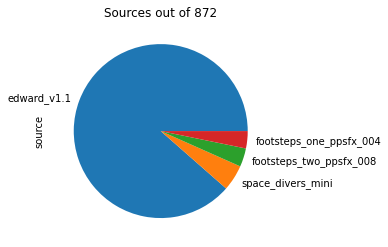

In [ ]:
#hide_input

metadata["source"].value_counts().plot(kind="pie", title='Sources out of ' + str(row_count))
plt.gcf().set_facecolor("white")

More importantly, what's the distribution of each high-level category and how much they contribute in audio length.

<AxesSubplot:title={'center':'Audio Length per Category'}, ylabel='length'>

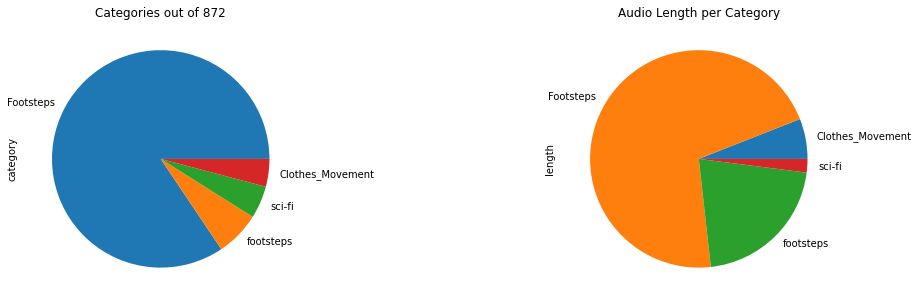

In [ ]:
#hide_input

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.subplots_adjust(wspace=0.8)
plt.gcf().set_facecolor("white")

plt.subplot(1, 2, 1)
metadata["category"].value_counts().plot(kind='pie', title='Categories out of ' + str(row_count))
plt.subplot(1, 2, 2)
metadata.groupby("category")["length"].sum().plot(kind="pie", title='Audio Length per Category')

<AxesSubplot:title={'center':'Length of audio (in seconds)'}, ylabel='Frequency'>

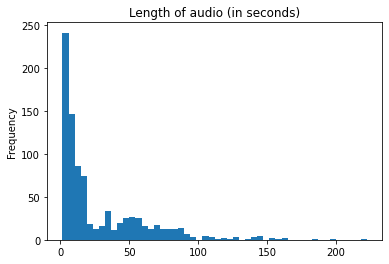

In [ ]:
#hide_input

metadata["length"].plot(kind="hist", bins=50, title='Length of audio (in seconds)')

Looks like we have some very short audio files, let's have a look.

In [ ]:
#hide

from IPython.display import display, Audio
import librosa as lr

how_many = 3

In [ ]:
#hide_input

shortest_rows = metadata.loc[metadata['length'].sort_values(ascending=True).index].head(how_many)
shortest_rows

,filename,category,label,extra,source,version,length
6,3bb50f9989c51208.wav,sci-fi,"Impact,Medium_iron_vibe",NaN,space_divers_mini,11,1.521448
5,6977f9c8f59a9192.wav,sci-fi,"Impact,Medium_iron_vibe",NaN,space_divers_mini,11,1.950417
733,210497c485c39de6.wav,Footsteps,"Hardwood,Scrape,Boot_scrape_scuff_special_dist...",NaN,edward_v1.1,11,2.905667


In [ ]:
#hide

# for filename in shortest_rows["filename"].to_list():
#     audio_data, sample_rate = lr.load(AUDIO_PATH + filename)
#     display(Audio(audio_data, rate=sample_rate))

And some very long ones too!

In [ ]:
#hide_input

longest_rows = metadata.loc[metadata['length'].sort_values(ascending=False).index].head(how_many)
longest_rows

,filename,category,label,extra,source,version,length
82,d8198033b156e3f0.wav,footsteps,"Wade,Water_deep",Footsteps Water Deep Wade Wave Bubble Gurgle S...,footsteps_two_ppsfx_008,11,222.422500
99,6e348a56f2cdf53d.wav,footsteps,"Scuffs,Water_deep",Footsteps Water Deep Scuffs Shuffle Wave Bubbl...,footsteps_two_ppsfx_008,11,199.084417
95,dcc9f4bb705d1fa9.wav,footsteps,"Scuffs,Water_shallow",Footsteps Water Shallow Scuffs Shuffle Wave Bu...,footsteps_two_ppsfx_008,11,183.943385


In [ ]:
#hide

# for filename in longest_rows["filename"].to_list():
#     audio_data, sample_rate = lr.load(AUDIO_PATH + filename)
#     display(Audio(audio_data, rate=sample_rate))

## Let's look into our labels

Now let's investigate how many labels are defined per audio file.

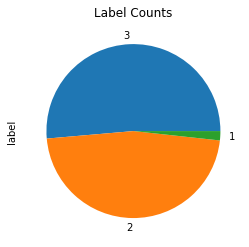

In [ ]:
#hide_input

metadata["label"].str.split(",").apply(len).value_counts().plot(kind='pie', title='Label Counts')
plt.gcf().set_facecolor("white")

Next we look at the occurrences for each individual label, both the top and bottom.  

Ideally our data covers sufficient labels, but doesn't treat every row as a different type. We seem to be doing well there.  
This means we want to have as many different types of labels as possible, while minimising the number of single occurrence labels.  

<AxesSubplot:title={'center':'Bottom 10 Labels'}>

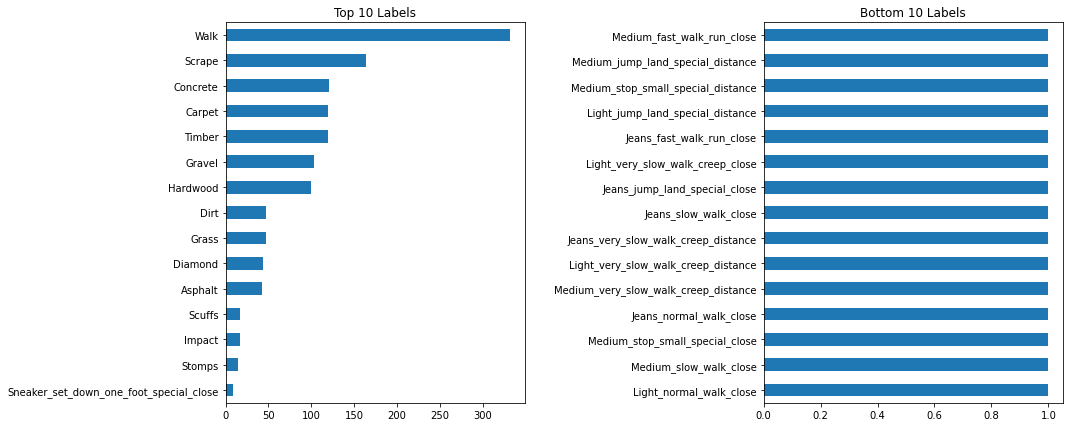

In [ ]:
#hide_input

how_many = 15
label_occurrences = metadata["label"].str.split(",").apply(pd.Series, 1).stack().value_counts().sort_values()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, how_many // 2))
fig.subplots_adjust(wspace=0.8)
axes[0].xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))

plt.subplot(1, 2, 1)
label_occurrences[-how_many:].plot(kind='barh', title='Top 10 Labels')
plt.subplot(1, 2, 2)
label_occurrences[:how_many].plot(kind='barh', title='Bottom 10 Labels')


We have a bunch of single occurrence labels, let's count them.

In [ ]:
#collapse

sum(metadata["label"].str.split(",").apply(len) == 1)

15

Let's look at some of those rows with single labels.

In [ ]:
#hide_input

metadata.loc[metadata["label"].str.split(",").apply(len) == 1].sample(15)

,filename,category,label,extra,source,version,length
846,7237eb0a9bf2d75b.wav,Clothes_Movement,Light_stop_small_special_distance,NaN,edward_v1.1,11,9.438031
858,c7fe44c592ed444d.wav,Clothes_Movement,Medium_stop_small_special_close,NaN,edward_v1.1,11,8.261677
31,a7d9f3dd6fdaeb55.wav,sci-fi,Bubbles,NaN,space_divers_mini,11,7.233333
837,5e0fc337b16bc512.wav,Clothes_Movement,Jeans_jump_land_special_close,NaN,edward_v1.1,11,9.566990
850,c5ca25a54ba92988.wav,Clothes_Movement,Jeans_jump_land_special_distance,NaN,edward_v1.1,11,9.566990
852,efefb91ff315bb09.wav,Clothes_Movement,Jeans_stop_small_special_distance,NaN,edward_v1.1,11,9.536875
849,aaf611ea4563ee74.wav,Clothes_Movement,Medium_jump_land_special_close,NaN,edward_v1.1,11,8.265427
862,0e9c1af327db93e8.wav,Clothes_Movement,Medium_jump_land_special_distance,NaN,edward_v1.1,11,8.265427
865,9423db1b77921bcc.wav,Clothes_Movement,Medium_stop_small_special_distance,NaN,edward_v1.1,11,8.261677
9,9e0d308eaaf582db.wav,sci-fi,Bubbles,NaN,space_divers_mini,11,12.943135


Sounds like the `Clothes_movement` category needs more attention or is hard to label.